In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import joblib


In [39]:
# Set display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [40]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [41]:
# Load data
df = pd.read_csv(url, names=column_names, sep=', ', engine='python')

In [42]:
# Display the first few rows
print("Dataset Preview:")
df.head()

Dataset Preview:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
# Basic dataset information
print("\nDataset Shape:", df.shape)
print("\nDataset Information:")
df.info()


Dataset Shape: (32561, 15)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Check for '?' values which often represent missing data in this dataset
print("\nChecking for '?' values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {(df[col] == ' ?').sum()}")

# Replace '?' with NaN for better handling
df = df.replace(' ?', np.nan)
print("\nMissing Values After Replacement:")
print(df.isnull().sum())


Missing Values Count:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Checking for '?' values in categorical columns:
workclass: 0
education: 0
marital-status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
native-country: 0
income: 0

Missing Values After Replacement:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [45]:
# Statistical summary of numerical features
print("\nStatistical Summary of Numerical Features:")
df.describe()


Statistical Summary of Numerical Features:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



Income Distribution:
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


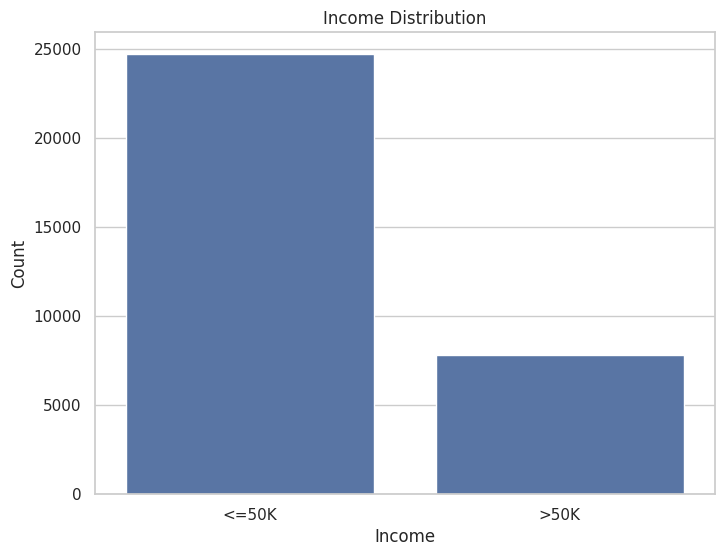

In [46]:
# Distribution of the target variable (income)
print("\nIncome Distribution:")
income_distribution = df['income'].value_counts(normalize=True) * 100
print(income_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.ylabel('Count')
plt.xlabel('Income')
plt.show()

In [47]:
# Explore categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", list(categorical_columns))


Categorical Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


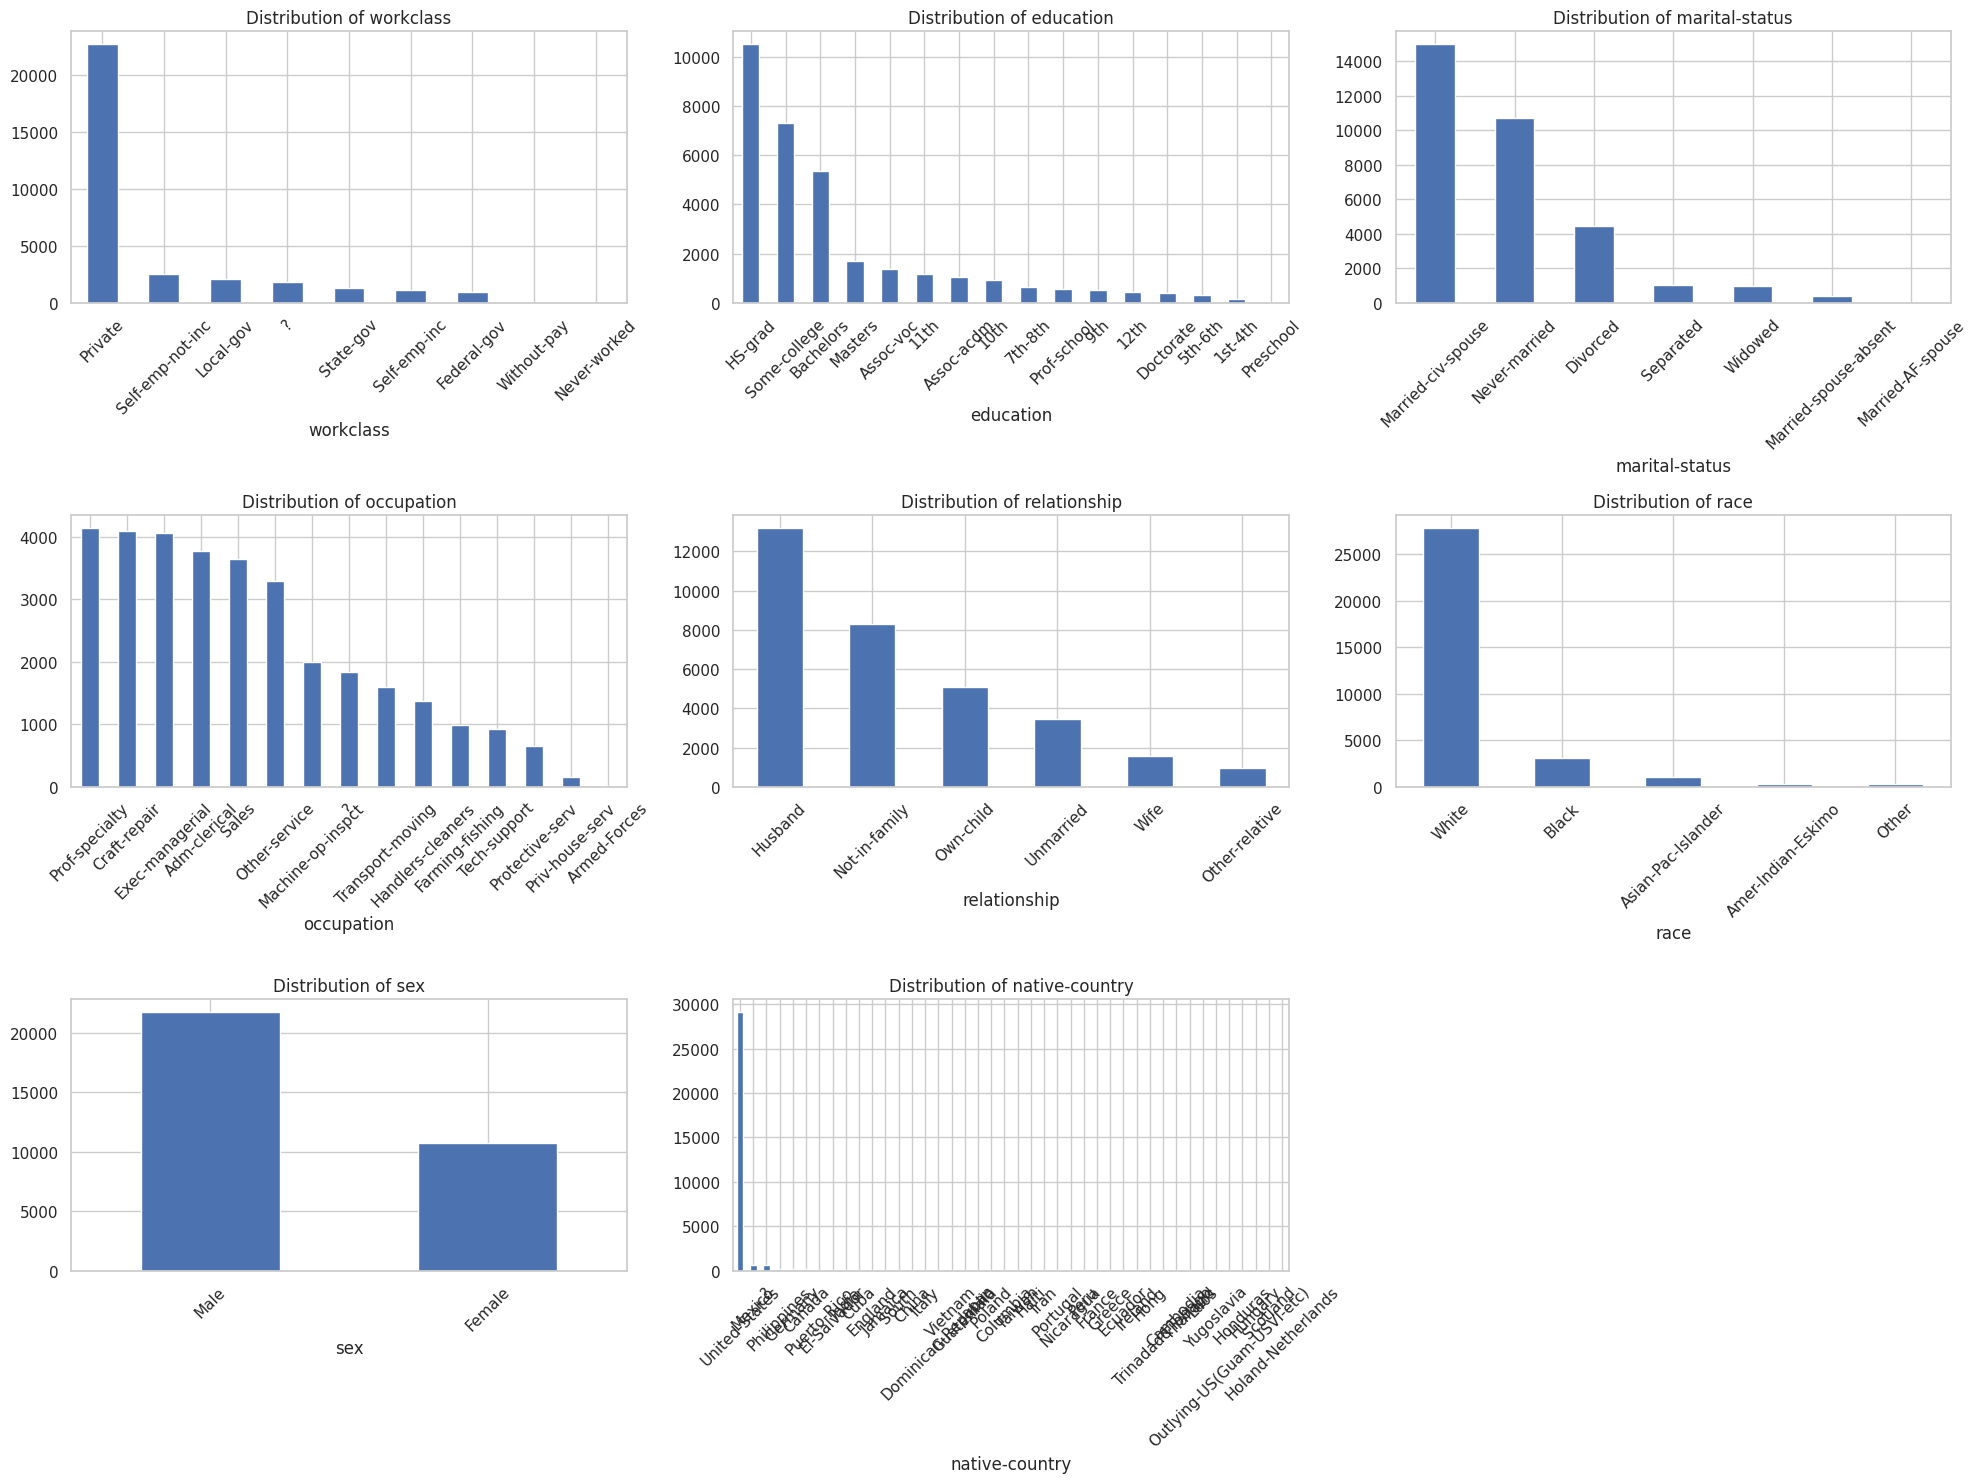

In [48]:
# Distribution of categorical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns):
    if col != 'income':
        plt.subplot(3, 3, i+1)
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analyze the relationship between categorical features and income:**

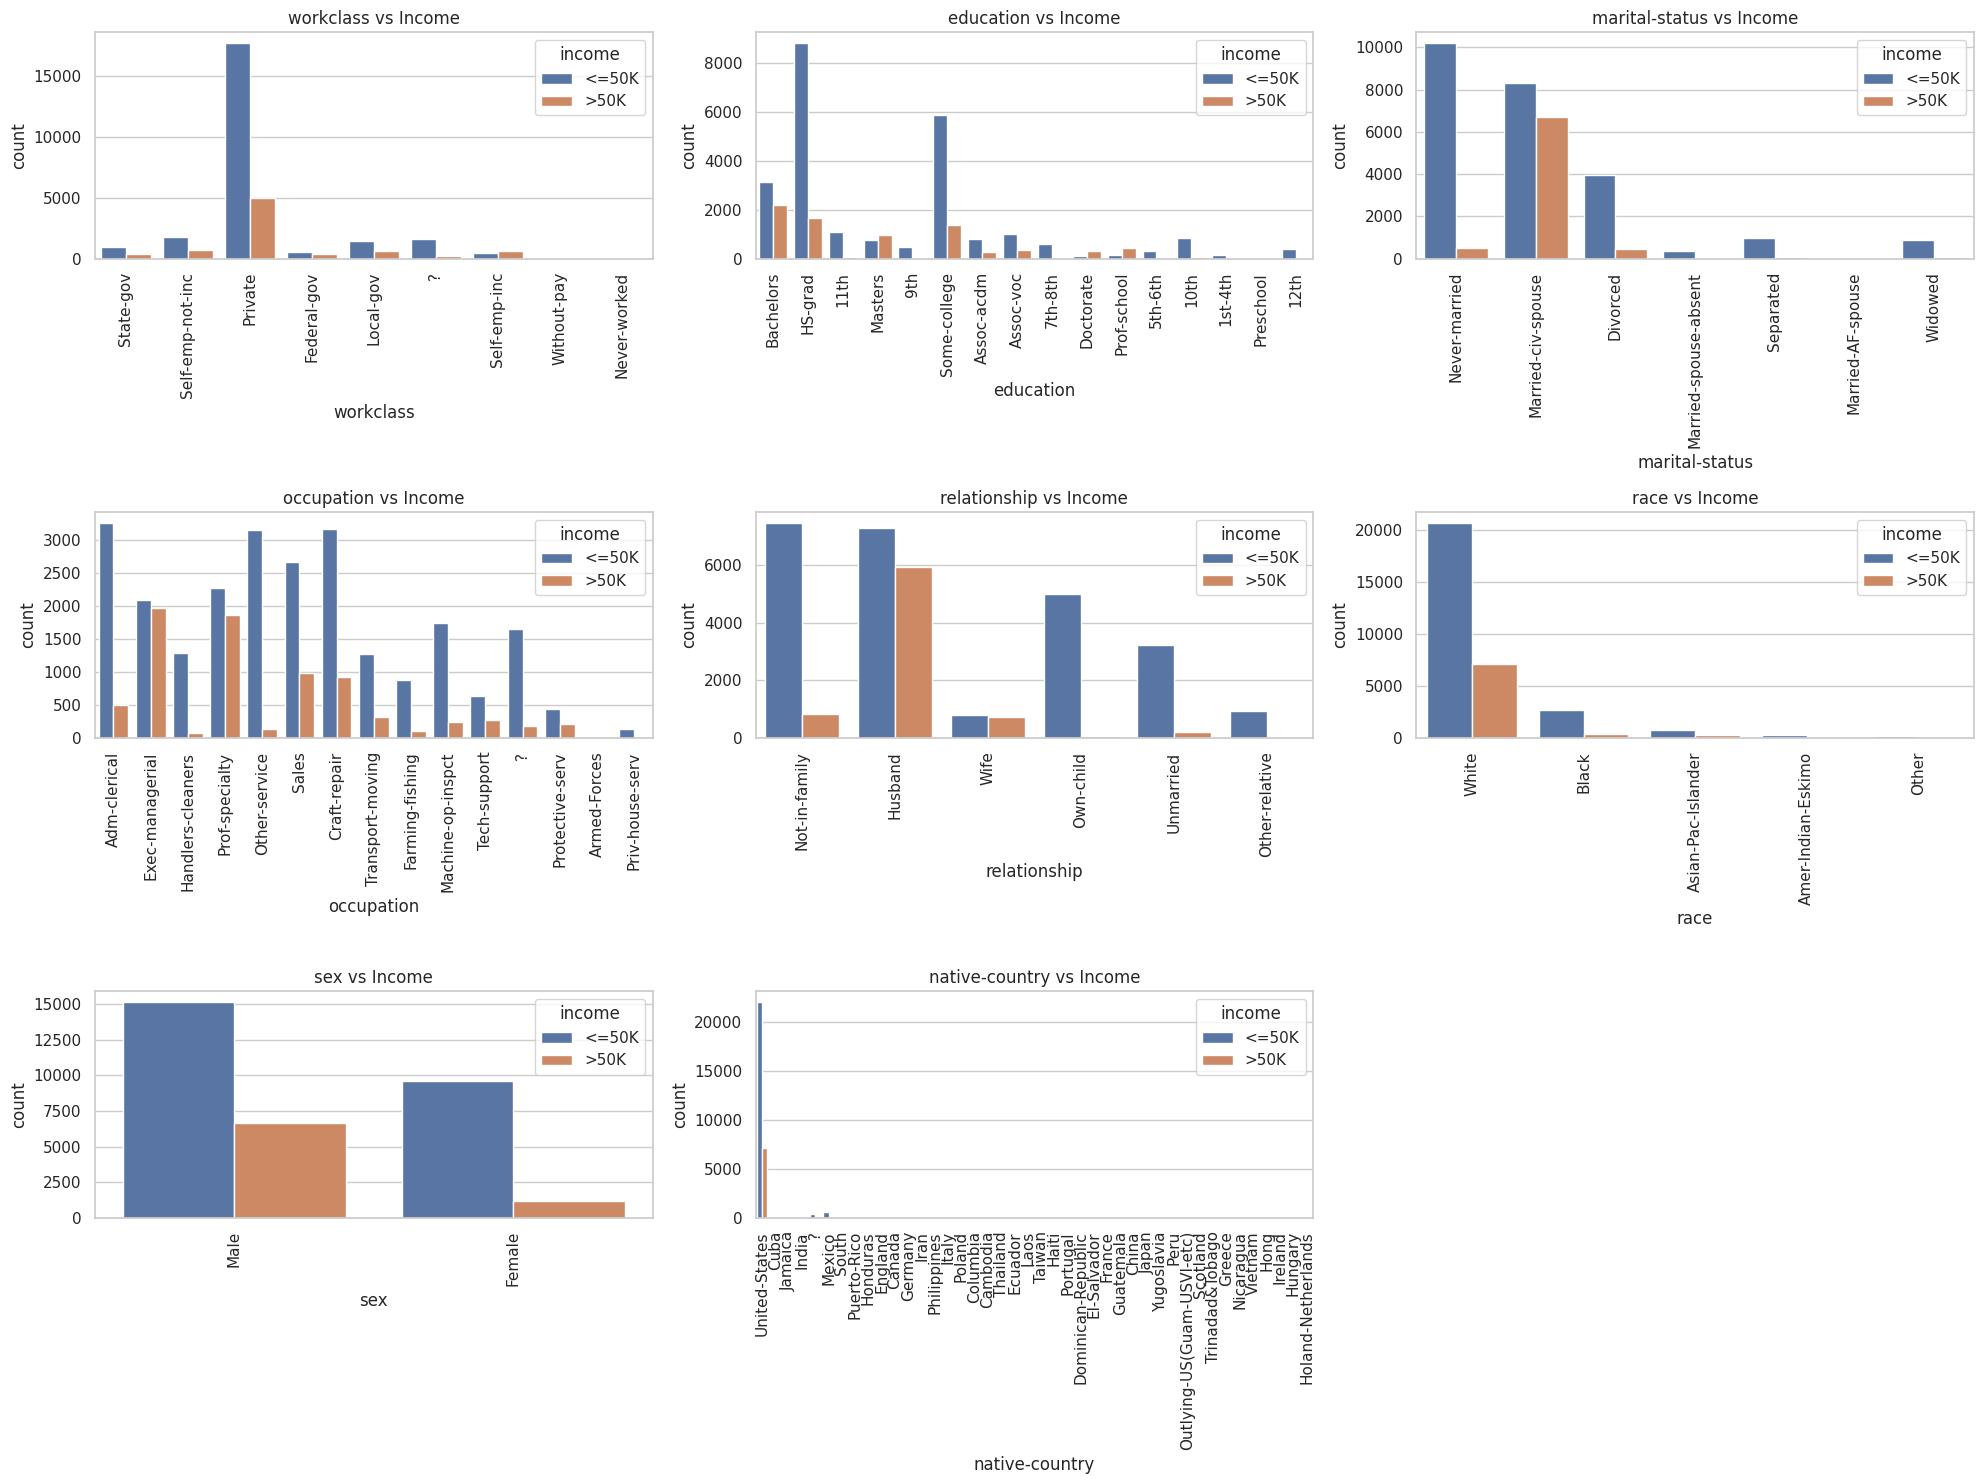

In [49]:
# Relationship between categorical features and income
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns):
    if col != 'income':
        plt.subplot(3, 3, i+1)
        sns.countplot(x=col, hue='income', data=df)
        plt.title(f'{col} vs Income')
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [50]:
# Explore numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:", list(numerical_columns))


Numerical Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


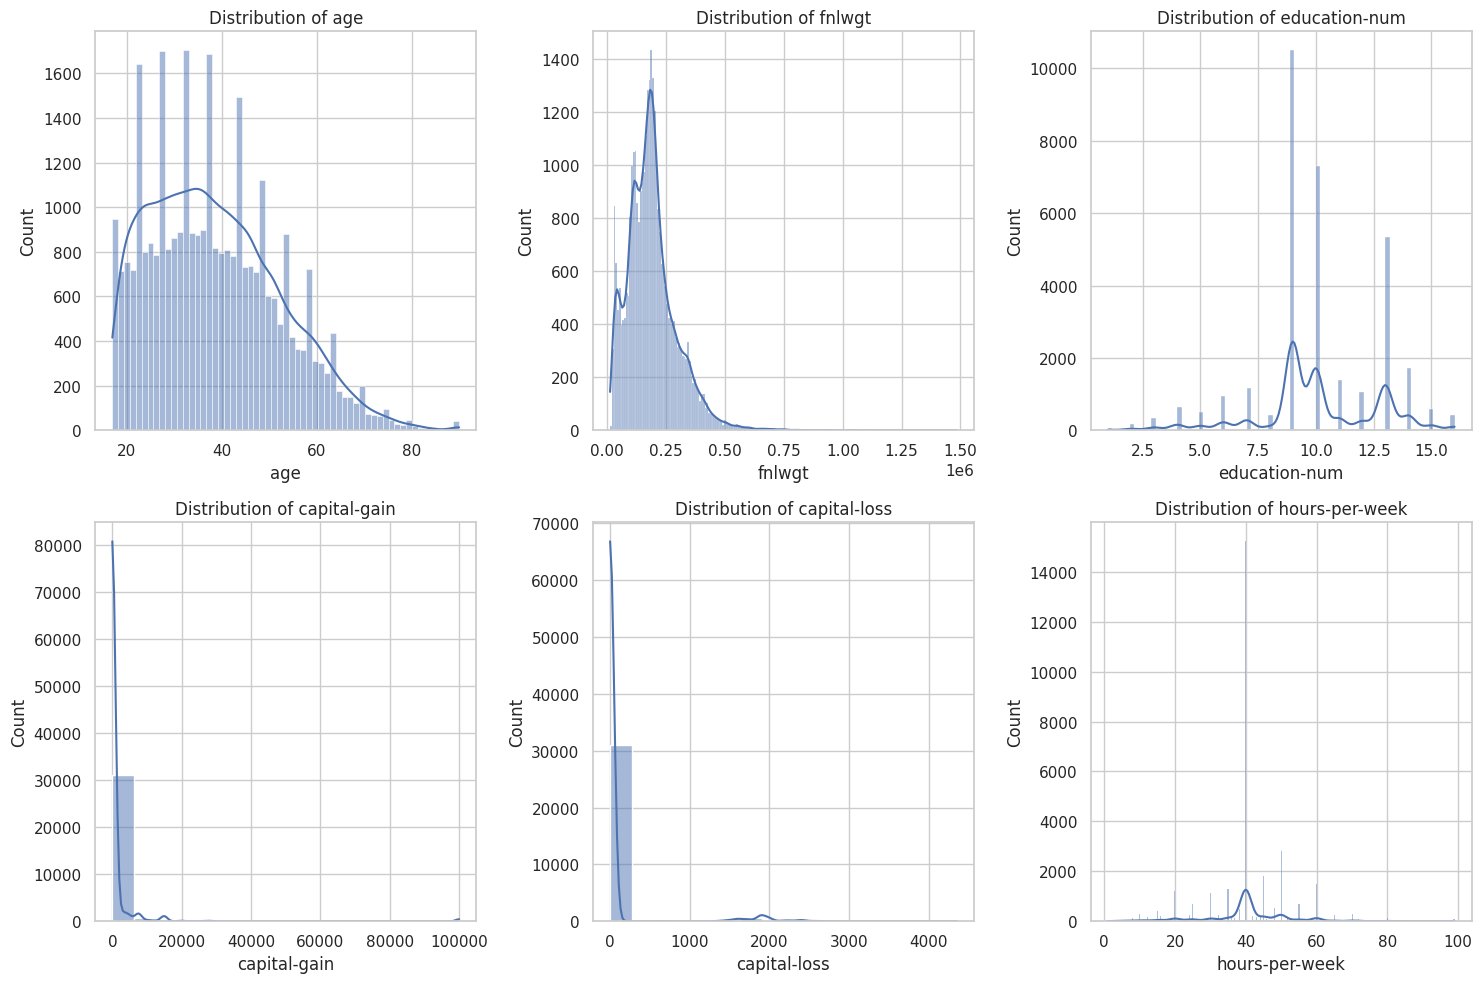

In [51]:
# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


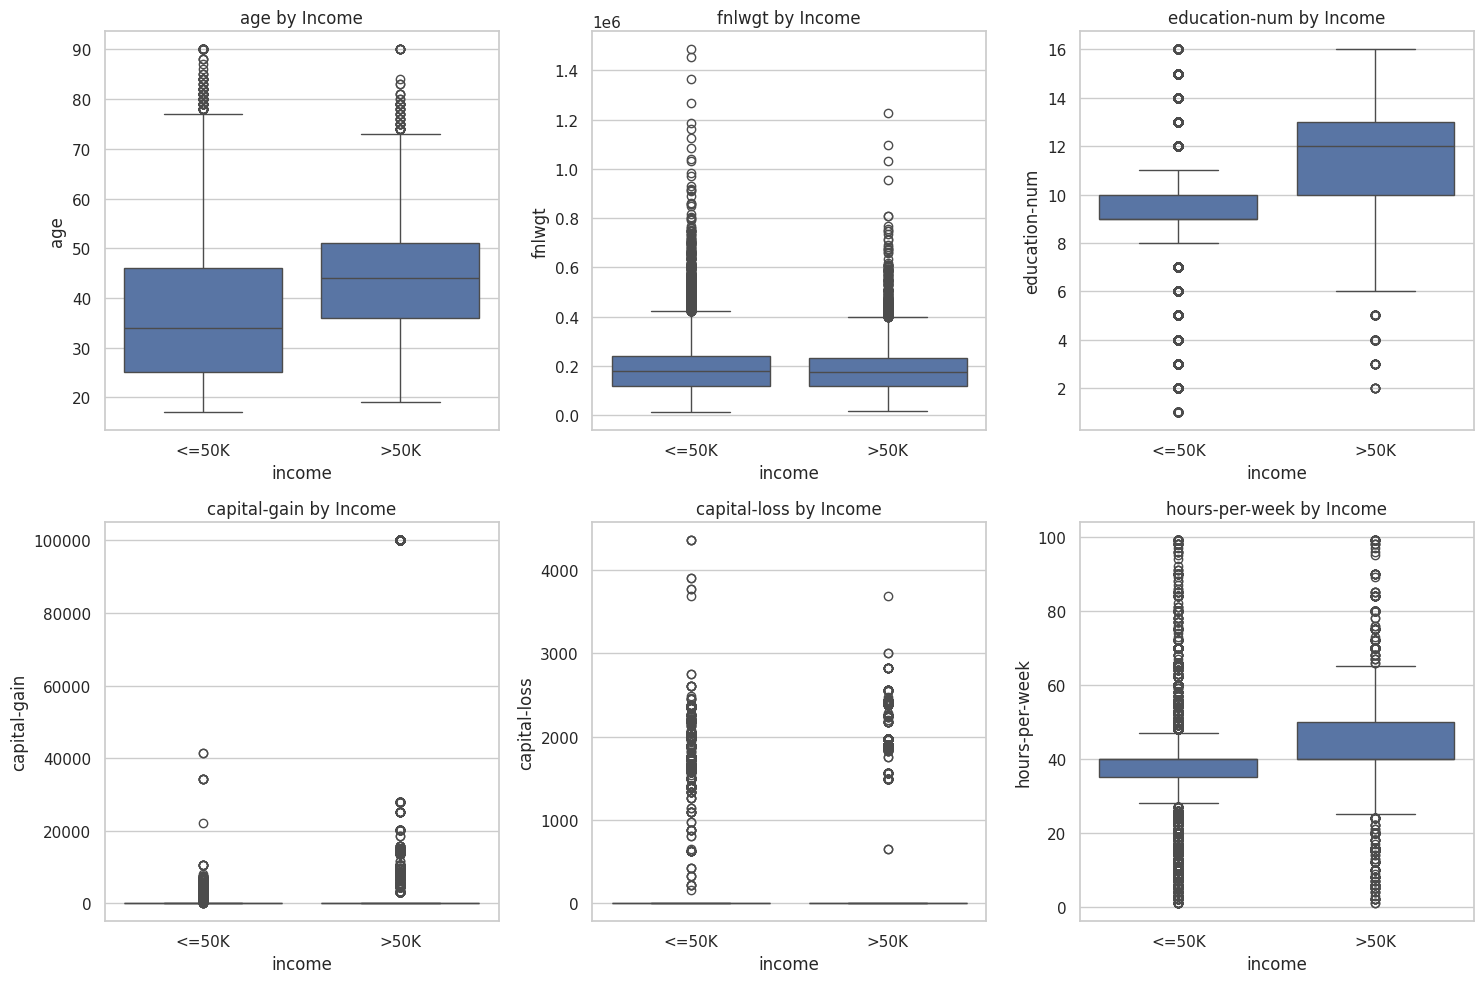

In [52]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f'{col} by Income')
plt.tight_layout()
plt.show()

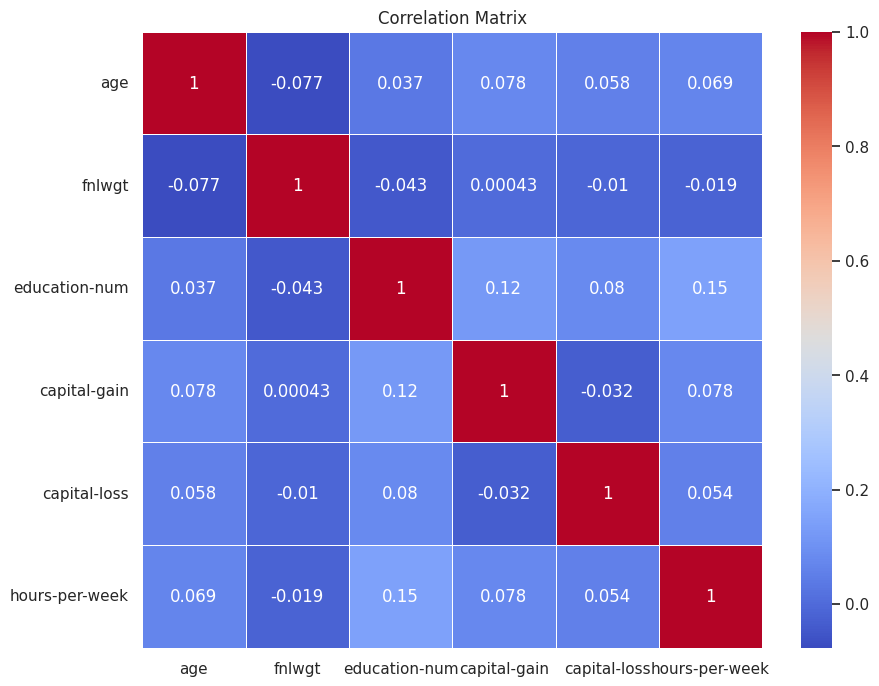

In [53]:
# Correlation between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


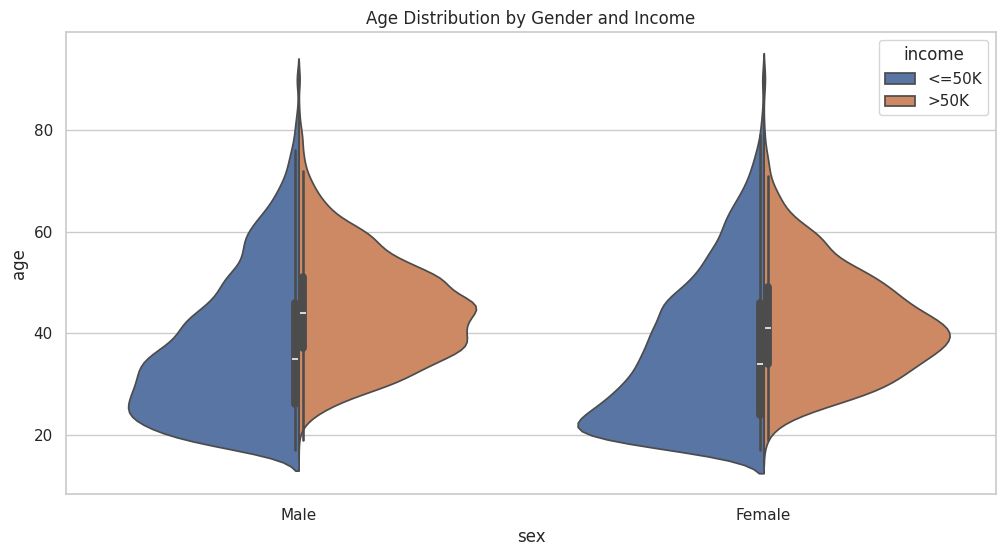

In [55]:
# Age distribution by gender and income
plt.figure(figsize=(12, 6))
sns.violinplot(x='sex', y='age', hue='income', data=df, split=True)
plt.title('Age Distribution by Gender and Income')
plt.show()


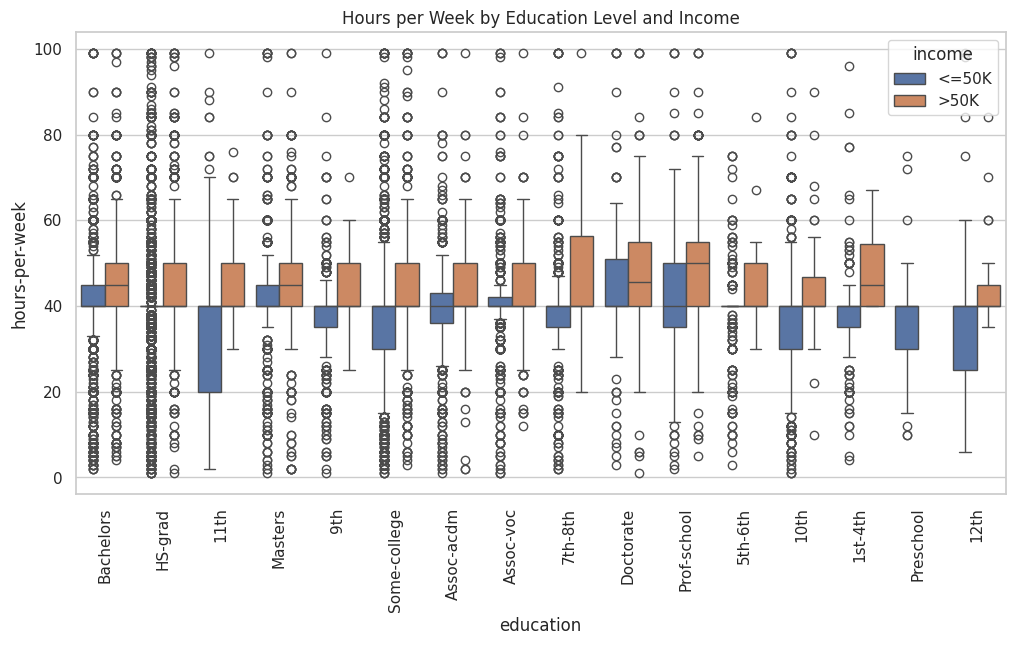

In [56]:
# Relationship between education, hours-per-week, and income
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='hours-per-week', hue='income', data=df)
plt.title('Hours per Week by Education Level and Income')
plt.xticks(rotation=90)
plt.show()


In [57]:
# Summary of findings
print("\nSummary of Key Findings:")
print(f"1. Dataset contains {df.shape[0]} records and {df.shape[1]} features.")
print(f"2. Income distribution: {income_distribution.to_dict()}")
print(f"3. Age range: {df['age'].min()} to {df['age'].max()} years, with mean age of {df['age'].mean():.2f} years.")
print(f"4. Most common education level: {df['education'].value_counts().index[0]}")
print(f"5. Most common occupation: {df['occupation'].value_counts().index[0]}")
print(f"6. Gender distribution: {df['sex'].value_counts(normalize=True) * 100}")
print(f"7. Average hours worked per week: {df['hours-per-week'].mean():.2f}")



Summary of Key Findings:
1. Dataset contains 32561 records and 15 features.
2. Income distribution: {'<=50K': 75.91904425539757, '>50K': 24.080955744602438}
3. Age range: 17 to 90 years, with mean age of 38.58 years.
4. Most common education level: HS-grad
5. Most common occupation: Prof-specialty
6. Gender distribution: sex
Male      66.920549
Female    33.079451
Name: proportion, dtype: float64
7. Average hours worked per week: 40.44


**Data Preprocessing**

---



In [58]:
# Handle missing values
df = df.replace(' ?', np.nan)
df_cleaned = df.dropna()

#Encode categorical variables
from sklearn.preprocessing import LabelEncoder

df_encoded = df_cleaned.copy()
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

#Scale numerical features
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

#Split the dataset
from sklearn.model_selection import train_test_split

X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Fitting**

---



In [62]:
# Define the models to be used
models = {
    'Logistic_Regression': LogisticRegression(max_iter=1000),
    'Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support_Vector_Machine': SVC(probability=True, random_state=42),
    'Nurel_Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

In [65]:
# Train the selected models on the training data
trained_models = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    trained_models[model_name] = model

    # Save the trained model
    joblib.dump(model, f'{model_name.replace(" ", "_").lower()}_model.pkl')
    print(f"{model_name} trained and saved successfully.")

print("All models have been trained and saved.")

Training Logistic_Regression...
Logistic_Regression trained and saved successfully.
Training Decision_Tree...
Decision_Tree trained and saved successfully.
Training Random_Forest...
Random_Forest trained and saved successfully.
Training Support_Vector_Machine...
Support_Vector_Machine trained and saved successfully.
Training Nurel_Network...
Nurel_Network trained and saved successfully.
All models have been trained and saved.


**Model Evaluation**

---




Model Accuracy Results:
Logistic_Regression: 0.8247
Decision_Tree: 0.8128
Random_Forest: 0.8623
Support_Vector_Machine: 0.8113
Nurel_Network: 0.8445


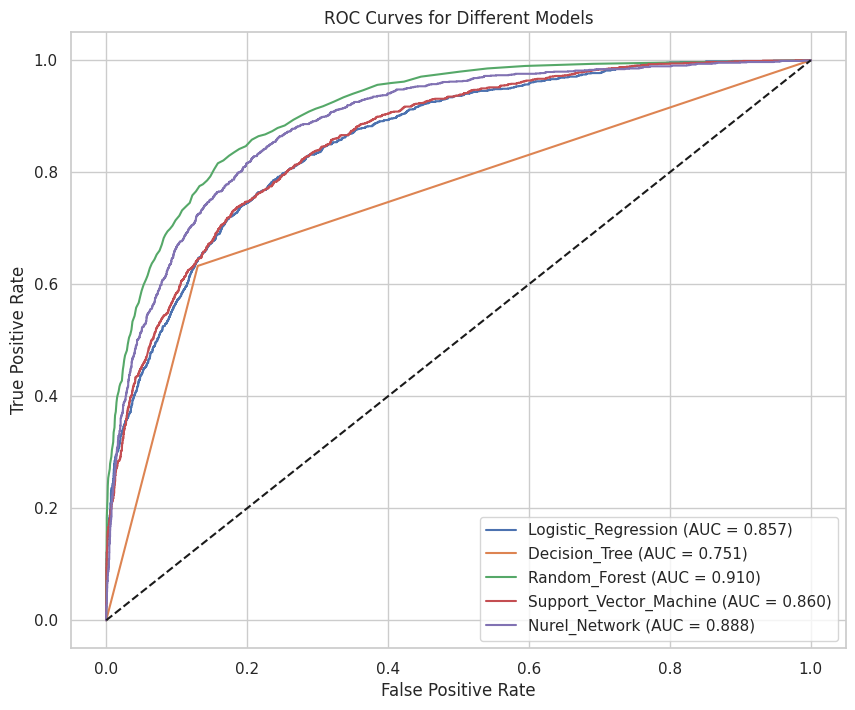

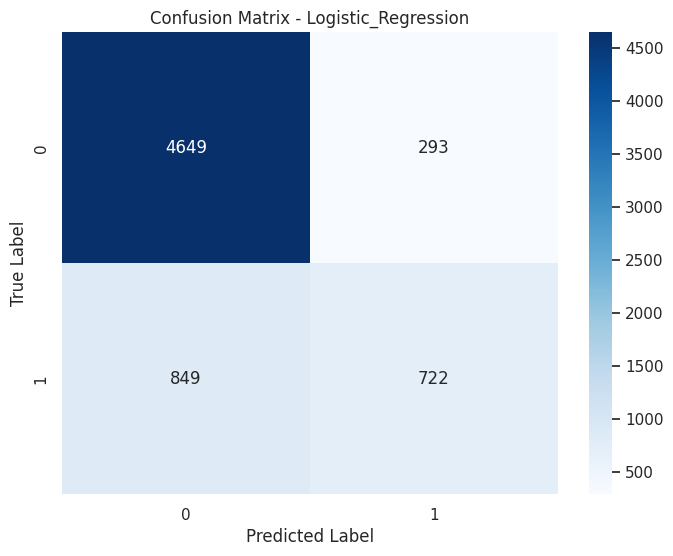


Classification Report - Logistic_Regression:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.71      0.46      0.56      1571

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



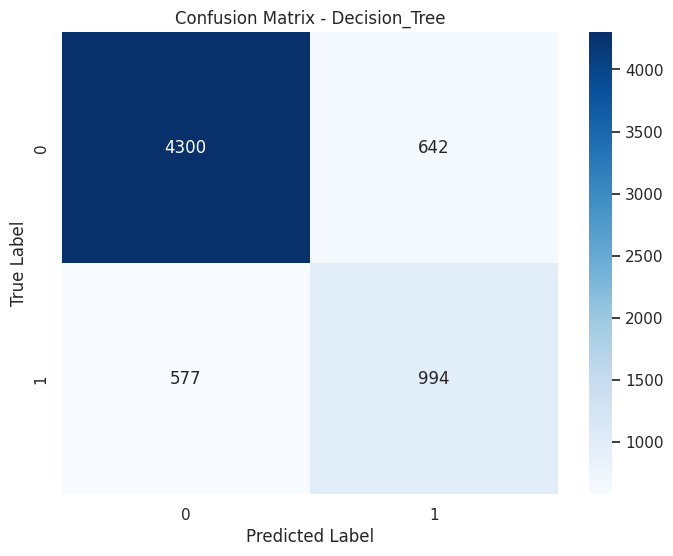


Classification Report - Decision_Tree:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4942
           1       0.61      0.63      0.62      1571

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.75      6513
weighted avg       0.82      0.81      0.81      6513



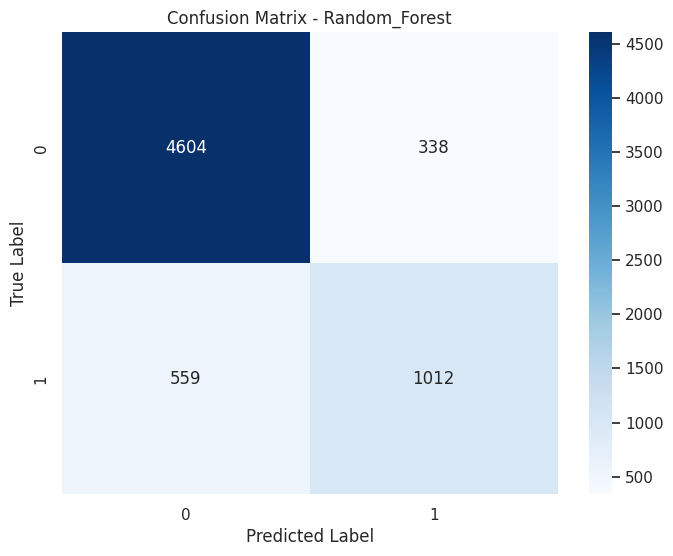


Classification Report - Random_Forest:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.75      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



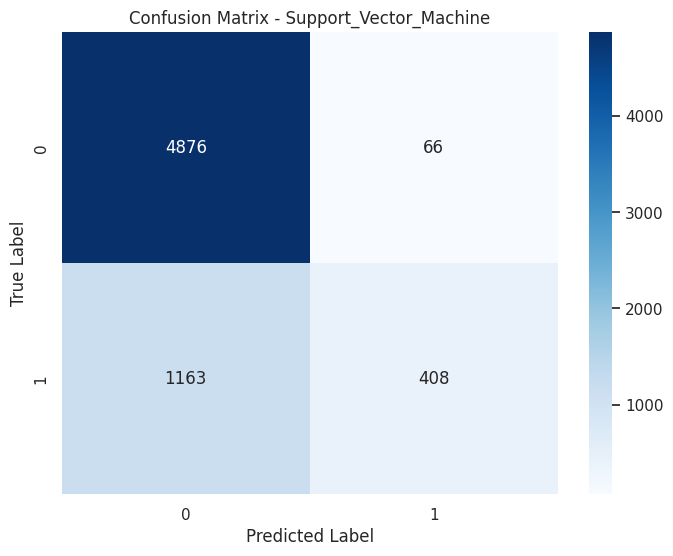


Classification Report - Support_Vector_Machine:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4942
           1       0.86      0.26      0.40      1571

    accuracy                           0.81      6513
   macro avg       0.83      0.62      0.64      6513
weighted avg       0.82      0.81      0.77      6513



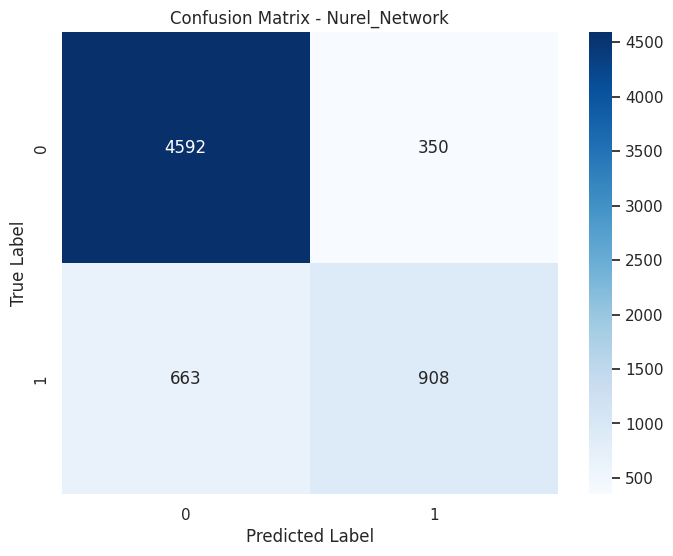


Classification Report - Nurel_Network:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4942
           1       0.72      0.58      0.64      1571

    accuracy                           0.84      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [68]:
# Evaluate each model
results = {}
for name, model in trained_models.items():
    # Make predictions
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': classification_report(y_test, predictions)
    }

    # Calculate ROC curve and AUC (if applicable)
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, probs)
        model_auc = auc(fpr, tpr)
        results[name]['ROC'] = (fpr, tpr)
        results[name]['AUC'] = model_auc

# Print accuracy results
print("\nModel Accuracy Results:")
for name, result in results.items():
    print(f"{name}: {result['Accuracy']:.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    if 'ROC' in result:
        fpr, tpr = result['ROC']
        plt.plot(fpr, tpr, label=f'{name} (AUC = {result["AUC"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices
for name, result in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print(f"\nClassification Report - {name}:")
    print(result['Classification Report'])

**Random Forest** model performs best for our Adult Census Income dataset

In [73]:
# Save the trained Random Forest model
joblib.dump(trained_models['Random_Forest'], 'random_forest_income_prediction_model.pkl')


['random_forest_income_prediction_model.pkl']

In [75]:
from google.colab import files
files.download('random_forest_income_prediction_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>